# Multilayer Perceptron MNIST Dataset

Construction of a 2-layer MLP for MNIST digit classfication. This is a project done as a practice for the Coursera course "Introduction to Machine Learning". Most of the code was built from the guide of a Jupyter Notebook: https://www.coursera.org/learn/machine-learning-duke/ungradedLab/IP4b8/logistic-regression/lab?path=%2Fnotebooks%2F2A_Logistic_Regression.ipynb.

## MLP using basic PyTorch operations

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from tqdm.notebook import tqdm

## LOADING THE DATA
training_set = datasets.MNIST(root="./datasets", train=True, transform=transforms.ToTensor(), download=True)
test_set = datasets.MNIST(root="./datasets", train=False, transform=transforms.ToTensor(), download=True)

train_loader = torch.utils.data.DataLoader(training_set, batch_size=50, shuffle=True) 
test_loader = torch.utils.data.DataLoader(training_set, batch_size=50, shuffle=False)

# Parameters

W1 = torch.randn(784,512)/np.sqrt(784)
W1.requires_grad_()
b1 = torch.zeros(512, requires_grad=True)

W2 = torch.randn(512,512)/np.sqrt(512)
W2.requires_grad_()
b2 = torch.zeros(512, requires_grad=True)

W3 = torch.randn(512,10)/np.sqrt(10)
W3.requires_grad_()
b3 = torch.zeros(10, requires_grad=True)

# Loss function
criterion = nn.CrossEntropyLoss()

# Optimizer
optimizer = torch.optim.SGD([W1,b1,W2,b2,W3,b3], lr = 0.01)

## TRAINING THE NETWORK
epochs = 5

for epoch in range(epochs):
    # Training loss
    train_loss = 0.0

    for images, labels in tqdm(train_loader):
        optimizer.zero_grad()
    
        # Forward pass with activation function
        x = images.view(-1, 28*28)
        x = F.relu(torch.matmul(x,W1) + b1)
        x = F.relu(torch.matmul(x,W2)+ b2)
        y = torch.matmul(x,W3) + b3
        loss = criterion(y, labels)
        
        #Backward Pass: gradient of the loss with respect to model parameters
        loss.backward()
        
        #Parameter update: optimization step
        optimizer.step()
        
        #Training Loss:
        train_loss += loss.item()*images.size(0)
        
        #Average loss over an epoch
    train_loss = train_loss/len(train_loader.dataset)
        
    print('Epoch: {} Training loss: {}'.format(epoch+1, train_loss))
    
    

  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch: 1 Training loss: 0.3271678587049246


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch: 2 Training loss: 0.1722189830026279


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch: 3 Training loss: 0.13218363161198796


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch: 4 Training loss: 0.10795997843301544


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch: 5 Training loss: 0.09164039575339605


In [3]:
# Testing
# Monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
    for images, labels in tqdm(test_loader):
        x = images.view(-1, 28*28)
        x = F.relu(torch.matmul(x,W1) + b1)
        x = F.relu(torch.matmul(x,W2)+ b2)
        out = torch.matmul(x,W3) + b3
    
        loss = criterion(y, labels)
        test_loss+= loss.item()*images.size(0)
    
    #Converting output probabilities to predicted class
        op, pred = torch.max(out,1)
        
    # Comparing predictions with labels
        correct = np.squeeze(pred.eq(labels.data.view_as(pred)))
        
        for i in range(50): # 20 is the batch size
            label = labels.data[i]
            class_correct[label]+=correct[i].item()
            class_total[label]+=1
        
    for i in range(10):
        if class_total[i] > 0:
            print('Test Accuracy of the digit %s: %d%% (%d/%d)' % (str(i), 100 * class_correct[i]/class_total[i], np.sum(class_correct[i]), np.sum(class_total[i])))
        else: 
            print ('No samples')
print('\n total accuracy: %d%% (%2d/%2d)' % (100* np.sum(class_correct)/np.sum(class_total), np.sum(class_correct), np.sum(class_total)))


  0%|          | 0/1200 [00:00<?, ?it/s]

Test Accuracy of the digit 0: 98% (5838/5923)
Test Accuracy of the digit 1: 99% (6707/6742)
Test Accuracy of the digit 2: 96% (5737/5958)
Test Accuracy of the digit 3: 95% (5848/6131)
Test Accuracy of the digit 4: 96% (5631/5842)
Test Accuracy of the digit 5: 98% (5320/5421)
Test Accuracy of the digit 6: 99% (5865/5918)
Test Accuracy of the digit 7: 97% (6120/6265)
Test Accuracy of the digit 8: 96% (5675/5851)
Test Accuracy of the digit 9: 97% (5829/5949)

 total accuracy: 97% (58570/60000)


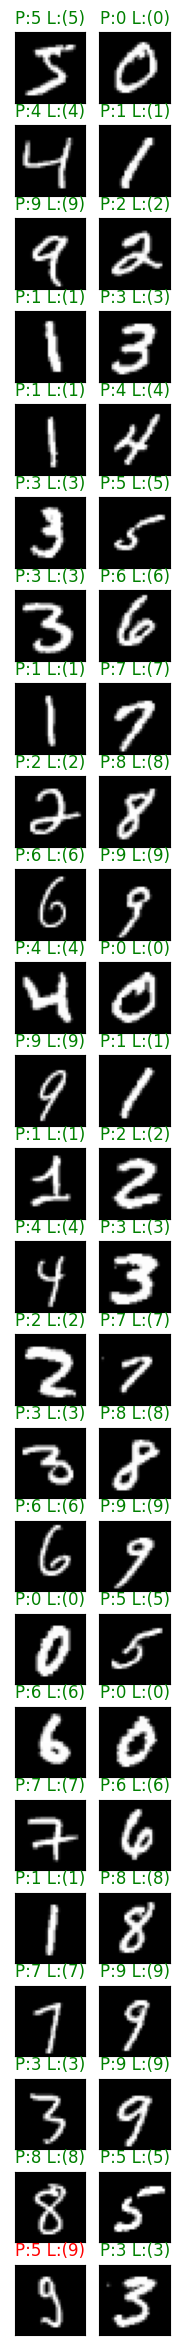

In [4]:
## Visualize Sample Test Results

testiter = iter(test_loader)
images, labels = next(testiter)
x = images.view(-1, 28*28)

# get sample outputs
x = F.relu(torch.matmul(x,W1) + b1)
x = F.relu(torch.matmul(x,W2)+ b2)
output = torch.matmul(x,W3) + b3

# converting output probabilities to predicted class
out_prob, prediction = torch.max(output, 1)
images = images.numpy()

# show images in the batch
fig = plt.figure(figsize=(2,30))
for idx in np.arange(50):
    ax = fig.add_subplot(25,2,idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    
    # P for prediction, L for label (true label)
    ax.set_title('P:{} L:({})'.format(str(prediction[idx].item()), str(labels[idx].item())), color= ("green" if prediction[idx]==labels[idx] else "red" ))

## MLP using object-oriented higher-level APIs.

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from tqdm.notebook import tqdm

class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        
        # 1 hidden node
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512,512)
        self.fc3 = nn.Linear(512,10)
        self.dropout = nn.Dropout(p = 0.2)
    
    def forward(self, x):
        
        # Flattening
        x = x.view(-1, 28*28)
        
        #Forward pass with relu activation function
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.fc3(x)
        return x

## Loading the data
train_set = datasets.MNIST(root="./datasets", train=True, transform=transforms.ToTensor(), download=True)
test_set = datasets.MNIST(root="./datasets", train=False, transform=transforms.ToTensor(), download=True)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=20, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=20, shuffle=False)


## Defining the MLP architecture
model = Net()

## Specify loss function, optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr =0.01)

## Training the Network
epochs = 5
model.train()

for epoch in range(epochs):
    # Training loss
    train_loss = 0.0
    
    for images, labels in tqdm(train_loader):
        # Clear the gradients of all optimized variables
        optimizer.zero_grad()
        
        #Forward Pass: predicted outputs
        out = model(images)
        # Loss
        loss = criterion(out, labels)
        
        #Backward Pass: gradient of the loss with respect to model parameters
        loss.backward()
        
        #Parameter update: optimization step
        optimizer.step()
        
        #Training Loss:
        train_loss += loss.item()*images.size(0)
        
        #Average loss over an epoch
    train_loss = train_loss/len(train_loader.dataset)
        
    print('Epoch: {} Training loss: {}'.format(epoch+1, train_loss))


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 1 Training loss: 0.8372375518331925


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 2 Training loss: 0.32805272858341533


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 3 Training loss: 0.25133924777805805


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 4 Training loss: 0.20584168718817333


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 5 Training loss: 0.17056835979161164


In [6]:
# Testing
# Monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

# Preparing model for evaluation
model.eval()

for images, labels in tqdm(test_loader):
    out = model(images)
    loss = criterion(out, labels)
    test_loss+= loss.item()*images.size(0)
    
    #Converting output probabilities to predicted class
    op, pred = torch.max(out,1)
    
    # Comparing predictions with labels
    correct = np.squeeze(pred.eq(labels.data.view_as(pred)))
    
    for i in range(20): # 20 is the batch size
        label = labels.data[i]
        class_correct[label]+=correct[i].item()
        class_total[label]+=1
        
for i in range(10):
    print('Test Accuracy of the digit %s: %d%% (%d/%d)' % (str(i), 100 * class_correct[i]/class_total[i], np.sum(class_correct[i]), np.sum(class_total[i])))
    
print('\n total accuracy: %d%% (%2d/%2d)' % (100* np.sum(class_correct)/np.sum(class_total), np.sum(class_correct), np.sum(class_total)))

  0%|          | 0/500 [00:00<?, ?it/s]

Test Accuracy of the digit 0: 98% (967/980)
Test Accuracy of the digit 1: 98% (1117/1135)
Test Accuracy of the digit 2: 94% (978/1032)
Test Accuracy of the digit 3: 95% (961/1010)
Test Accuracy of the digit 4: 95% (940/982)
Test Accuracy of the digit 5: 94% (839/892)
Test Accuracy of the digit 6: 96% (922/958)
Test Accuracy of the digit 7: 95% (986/1028)
Test Accuracy of the digit 8: 94% (919/974)
Test Accuracy of the digit 9: 93% (944/1009)

 total accuracy: 95% (9573/10000)


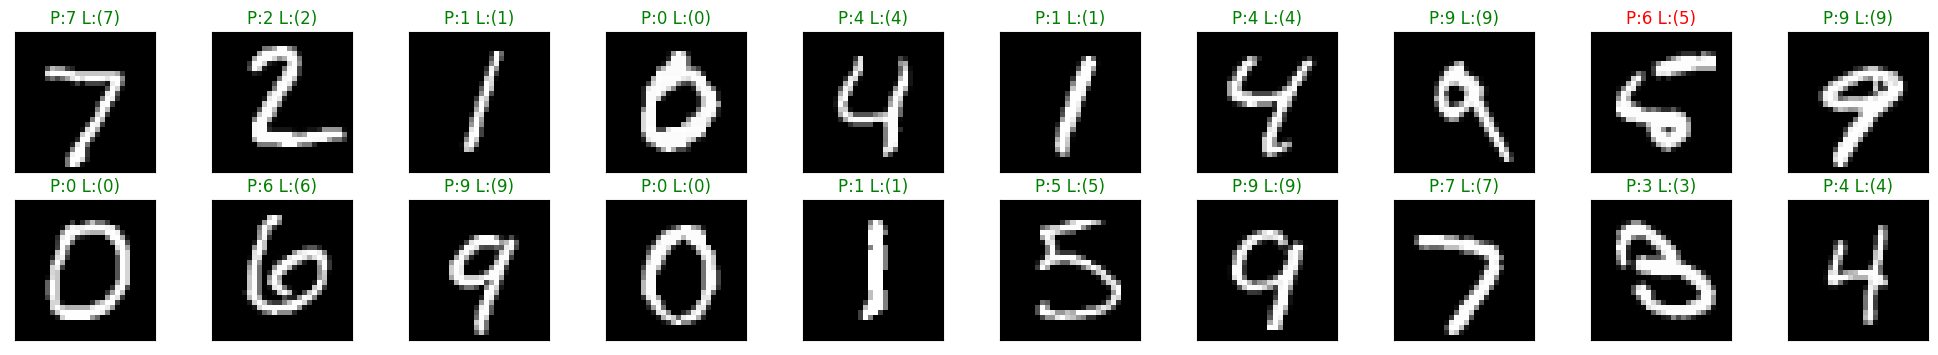

In [9]:
## Visualize Sample Test Results
testiter = iter(test_loader)
images, labels = next(testiter)
out = model(images)

# Converting output probabiliries to predicted class
prob, prediction = torch.max(out,1)
images = images.numpy()

fig = plt.figure(figsize=(25,4))

for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title('P:{} L:({})'.format(str(prediction[idx].item()), str(labels[idx].item())), color= ("green" if prediction[idx]==labels[idx] else "red" ))
